In [91]:
import numpy as np
from scipy import interp
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve,classification_report
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC


import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [92]:
# #############################################################################
# Data IO and generation

#open and read the dataset file
url = ('/IIT/FYP/Python/data_edit.csv')
data = pd.read_csv(url, header = 0)
data = data.drop(index=0)

le = LabelEncoder()
le.fit(['CLL', 'CML', 'HCL', 'Leukemia Positive', 'Normal'])
le.transform(['CLL', 'CML', 'HCL', 'Leukemia Positive', 'Normal']) 
data['Disease'] = le.fit_transform(data['Disease'])

In [93]:
X = data.drop('Disease', axis=1)
y = data['Disease']
# x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [94]:
print(X)

WBC   HGB  NENO  LYMNO  MONO  EONO  BANO   HCT   MCV  PLT
1     12.6  11.9   7.4    3.4   1.0   0.8   0.2  36.7  95.4  314
2      7.2  17.2   4.9    1.0   0.8   0.4   0.2  49.9  90.5  237
3      7.8  12.9   4.6    2.3   0.7   0.1   0.2  37.8  82.1  240
4      6.6  14.5   4.5    1.4   1.5   0.2   0.2  43.8  92.8  300
5      9.4  14.2   6.5    1.6   0.6   0.6   0.2  41.5  84.1  249
...    ...   ...   ...    ...   ...   ...   ...   ...   ...  ...
1577   9.4  14.4   4.4    4.2   0.6   0.1   0.1  40.3  77.6  318
1578   5.1  15.9   1.6    2.6   0.7   0.1   0.1  45.3  90.0  303
1579   7.1  13.5   4.5    1.8   0.6   0.1   0.1  41.3  96.1  177
1580   9.4  14.5   6.2    2.5   0.6   0.1   0.1  43.3  84.4  259
1581   5.9  18.3   3.6    3.3   0.8   0.2   0.1  55.4  90.7  228

[1581 rows x 10 columns]


In [95]:


# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

In [96]:

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################

In [100]:
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = SVC(kernel='linear', probability=True,random_state=random_state)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(x_train,y_train)
red_rfc = classifier.predict(x_test)
print(classification_report(y_test,red_rfc))
predicted_probas = classifier.predict_proba(x_test)


precision    recall  f1-score   support

           0       0.72      0.92      0.81        62
           1       0.95      0.78      0.86        69
           3       0.76      0.43      0.55        60
           4       0.67      0.89      0.76        63

    accuracy                           0.76       254
   macro avg       0.78      0.76      0.75       254
weighted avg       0.78      0.76      0.75       254



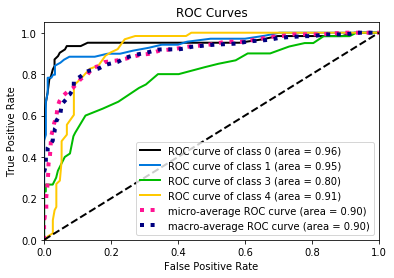

In [101]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# nb = GaussianNB()
# nb.fit(X_train, y_train)
# predicted_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()